In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [39]:
preference10_df = pd.read_csv("cleaned_data/preference10-cleaned.csv")
preference25_df = pd.read_csv("cleaned_data/preference25-cleaned.csv")
preference50_df = pd.read_csv("cleaned_data/preference50-cleaned.csv")

def parse_column_to_list(df, column_name):
    return df[column_name].apply(eval)


for df in [preference10_df, preference25_df, preference50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['answers'] = parse_column_to_list(df, 'answers')
    df['time'] = parse_column_to_list(df, 'time')

    df['average_accuracy'] = df['accuracy'].apply(lambda x: sum(x) / len(x))

In [40]:
preference10_df['accuracy']

0     [1, 1, 1, 1, 1, -1, 0, 1, -1, 0, 1, 0, 1, 1, 1...
1     [1, -1, 1, 1, 0, 1, -1, 1, 1, 0, 1, 0, 1, -1, ...
2     [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, ...
3     [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...
4     [-1, 1, 1, -1, 1, 0, 0, 1, 0, 1, 1, 1, -1, 1, ...
5     [-1, 0, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1...
6     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0,...
7     [1, 1, 1, 0, 1, 1, -1, 1, 0, 1, 0, 1, 1, 0, -1...
8     [0, 1, 1, 1, 1, -1, 1, 1, 1, 0, 0, 1, 1, 1, 1,...
9     [0, 0, 0, 1, 0, 1, 1, 0, 1, -1, 1, 1, -1, 1, 1...
10    [-1, 1, 1, 1, 1, -1, -1, 1, 0, 1, 0, -1, 1, 1,...
11    [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
12    [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 0,...
13    [1, 1, 1, -1, 1, 1, 0, 0, 1, -1, 1, -1, 1, 0, ...
14    [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1...
15    [1, 0, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1...
16    [1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 0...
17    [1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0

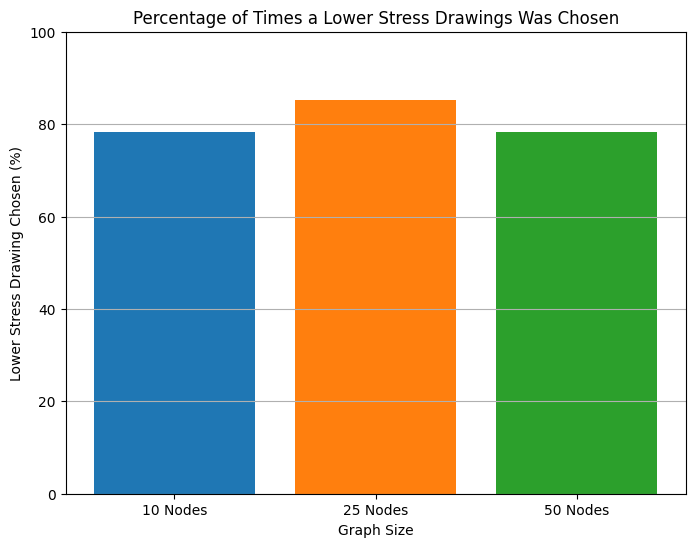

In [41]:
# Function to calculate the ratio of lower stress choices
def calculate_avg_lower_stress_chosen(df):
    def compute_ratio(accuracy):
        # Exclude same stress from the accuracy list
        filtered = [a for a in accuracy if a != -1]
        return sum(filtered) / len(filtered) if filtered else 0

    # Add the computed ratio as a new column
    df['avg_lower_stress_chosen'] = df['accuracy'].apply(compute_ratio)

# Apply the calculation to each dataset
for df in [preference10_df, preference25_df, preference50_df]:
    calculate_avg_lower_stress_chosen(df)


dataset_averages = {
    "10 Nodes": preference10_df['avg_lower_stress_chosen'].mean() * 100,
    "25 Nodes": preference25_df['avg_lower_stress_chosen'].mean() * 100,
    "50 Nodes": preference50_df['avg_lower_stress_chosen'].mean() * 100,
}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dataset_averages.keys(), dataset_averages.values(), color=['tab:blue', 'tab:orange', 'tab:green'])
plt.xlabel('Graph Size')
plt.title('Percentage of Times a Lower Stress Drawings Was Chosen')
plt.ylabel('Lower Stress Drawing Chosen (%)')
plt.ylim(0, 100)  # Add some padding above the highest bar
plt.grid(axis='y')

# Show the chart
plt.savefig('figures/mean_preferences.pdf', format='pdf')
plt.show()


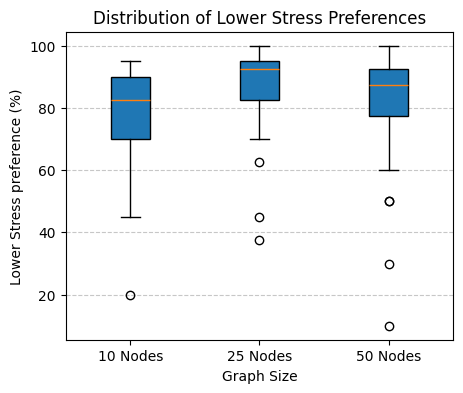

In [42]:
import matplotlib.pyplot as plt

# Function to calculate the ratio of lower stress choices
def calculate_ratio_lower_stress(df):
    def compute_ratio(accuracy):
        # Exclude same stress (-1) from the accuracy list
        filtered = [a for a in accuracy if a != -1]
        return sum(filtered) / len(filtered) if filtered else 0

    # Add the computed ratio as a new column
    df['lower_stress_ratio'] = df['accuracy'].apply(compute_ratio)

# Apply the calculation to each dataset
for df in [preference10_df, preference25_df, preference50_df]:
    calculate_ratio_lower_stress(df)

# Prepare data for box plots
data = [
    preference10_df['lower_stress_ratio'] * 100,
    preference25_df['lower_stress_ratio'] * 100,
    preference50_df['lower_stress_ratio'] * 100
]

# Plot the box plots
plt.figure(figsize=(5, 4))
plt.boxplot(data, labels=["10 Nodes", "25 Nodes", "50 Nodes"], patch_artist=True)
plt.xlabel('Graph Size')
plt.title('Distribution of Lower Stress Preferences')
plt.ylabel('Lower Stress preference (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.savefig('figures/boxplot_preferences.pdf', format='pdf')
plt.show()


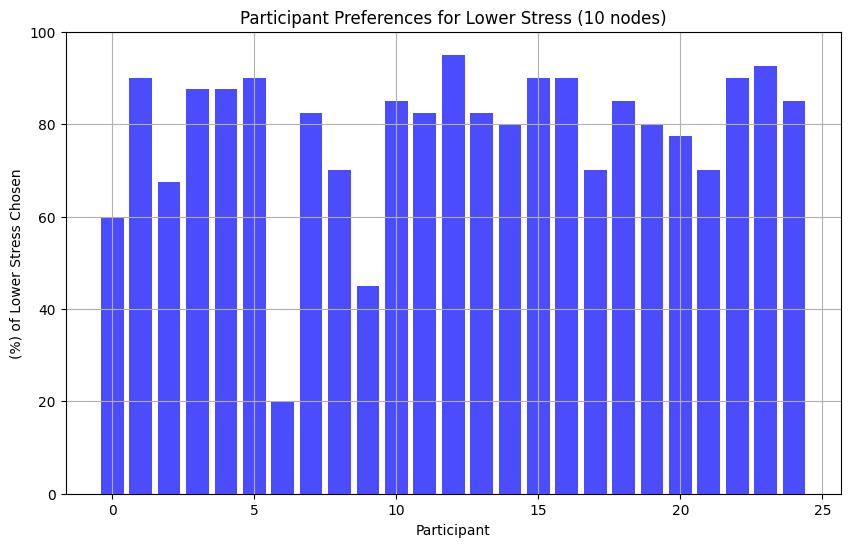

In [43]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference10_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (10 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

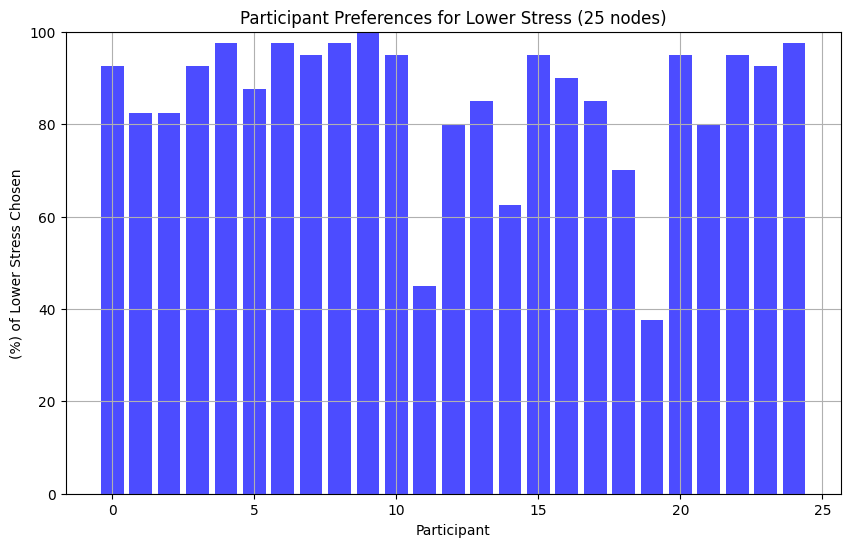

In [44]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference25_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (25 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

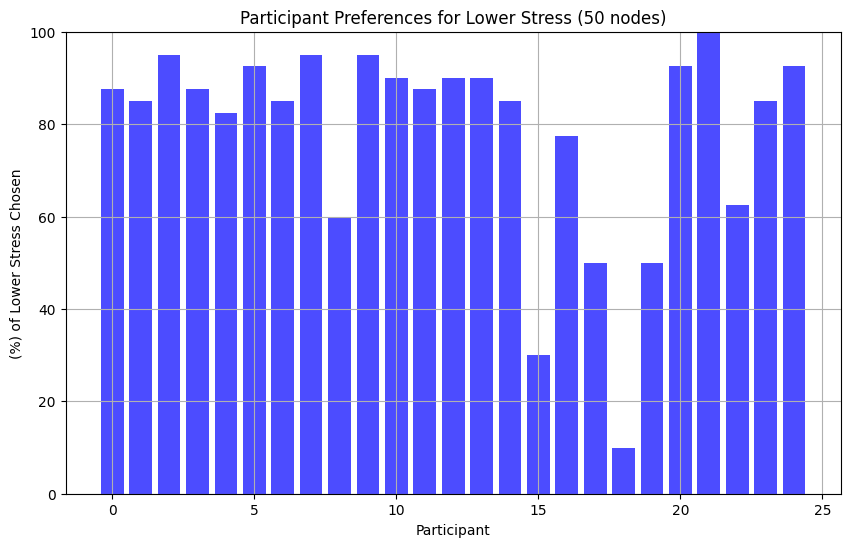

In [45]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.bar(preference10_df.index, preference50_df['avg_lower_stress_chosen'] * 100, color='blue', alpha=0.7)

# Add labels and titles
plt.xlabel('Participant')
plt.ylabel('(%) of Lower Stress Chosen')
plt.title('Participant Preferences for Lower Stress (50 nodes)')
plt.ylim(0,100)
plt.grid(True)

# Show the plot
plt.show()

## Exclude delta <=0.05

In [46]:
# Create a new accuracy column filtered by delta
def filter_accuracy_by_delta(df):
    def filter_row(deltas, accuracy):
        # Filter out values where delta <= 0.05
        filtered_accuracy = [a for d, a in zip(deltas, accuracy) if d > 35]
        return filtered_accuracy

    # Apply the filtering row by row
    df['filtered_accuracy'] = [
        filter_row(deltas, accuracy) for deltas, accuracy in zip(df['deltas'], df['accuracy'])
    ]

# Apply the filtering function to the preference10 dataset
filter_accuracy_by_delta(preference10_df)
filter_accuracy_by_delta(preference25_df)
filter_accuracy_by_delta(preference50_df)




In [47]:
preference10_df.head()

,Unnamed: 0,drawings,answers,time,strategy,overall_confidence,difficulty,familiarity,age,gender,...,StartDate,EndDate,stress_familiarity,correct_answers,deltas,accuracy,average_accuracy,avg_lower_stress_chosen,lower_stress_ratio,filtered_accuracy
0,0,"[['g4_l40_c', 'g4_l45_b'], ['g5_l70_a', 'g5_l6...","[2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, ...","[9.26, 6.925, 3.821, 9.326, 3.004, 6.12, 7.617...",How easy lines were to follow,3,2,3,2,1,...,2024-10-24 16:23:10,2024-10-24 16:31:00,3,"[3, 1, 3, 3, 3, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, ...","[5, 5, 10, 30, 20, 0, 35, 40, 0, 15, 20, 40, 2...","[1, 1, 1, 1, 1, -1, 0, 1, -1, 0, 1, 0, 1, 1, 1...",0.422222,0.600,0.600,"[1, 0, 1, 1, 1]"
1,1,"[['g4_l80_b', 'g4_l40_a'], ['g4_l40_c', 'g4_l4...","[1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, ...","[3.43, 8.508, 5.952, 6.333, 6.966, 3.576, 5.41...",Visual aspects that impacted my choice include...,2,3,3,3,2,...,2024-10-24 16:23:35,2024-10-24 16:31:00,3,"[1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, ...","[40, 0, 5, 20, 10, 30, 0, 25, 15, 10, 10, 5, 4...","[1, -1, 1, 1, 0, 1, -1, 1, 1, 0, 1, 0, 1, -1, ...",0.688889,0.900,0.900,"[1, 1, 1, 1, 1]"
2,2,"[['g2_l70_a', 'g2_l50_b'], ['g1_l75_a', 'g1_l4...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[3.176, 3.109, 7.196, 2.432, 5.169, 5.393, 6.8...",1. I prefer a drawing with larger distances be...,3,3,2,2,2,...,2024-10-29 15:08:30,2024-10-29 15:14:01,3,"[1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, ...","[20, 35, 5, 35, 40, 10, 5, 15, 20, 25, 5, 5, 4...","[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, ...",0.488889,0.675,0.675,"[1, 1, 1, 0, 1]"
3,3,"[['g3_l40_b', 'g3_l50_c'], ['g5_l55_c', 'g5_l5...","[2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, ...","[9.55, 3.89, 14.206, 6.139, 4.929, 6.08, 9.403...","Overall shape - preference for a larger, more ...",3,3,4,5,2,...,2024-10-29 15:06:14,2024-10-29 15:14:11,4,"[3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, ...","[10, 5, 25, 15, 5, 10, 40, 20, 30, 35, 40, 15,...","[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...",0.666667,0.875,0.875,"[1, 1, 1, 1, 1]"
4,4,"[['g3_l45_a', 'g3_l45_c'], ['g2_l55_b', 'g2_l4...","[2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, ...","[5.046, 8.899, 12.458, 5.382, 5.021, 7.729, 5....","My choice was base on clear diagram, once I co...",1,3,2,2,2,...,2024-10-29 15:06:13,2024-10-29 15:15:03,2,"[2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, ...","[0, 15, 25, 0, 25, 10, 15, 15, 5, 40, 40, 20, ...","[-1, 1, 1, -1, 1, 0, 0, 1, 0, 1, 1, 1, -1, 1, ...",0.666667,0.875,0.875,"[1, 1, 1, 1, 1]"


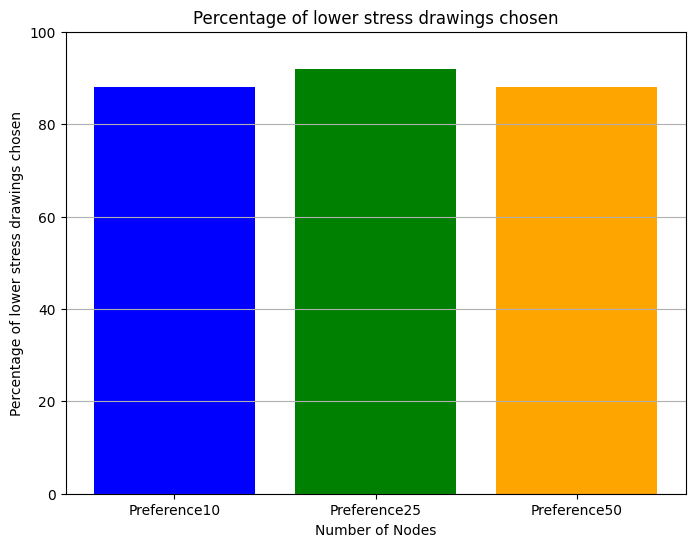

In [48]:
# Function to calculate the ratio of lower stress choices
def calculate_avg_lower_stress_chosen(df):
    def compute_ratio(accuracy):
        # Exclude same stress from the accuracy list
        filtered = [a for a in accuracy if a != -1]
        return sum(filtered) / len(filtered) if filtered else 0

    # Add the computed ratio as a new column
    df['filtered_avg_lower_stress_chosen'] = df['filtered_accuracy'].apply(compute_ratio)

# Apply the calculation to each dataset
for df in [preference10_df, preference25_df, preference50_df]:
    calculate_avg_lower_stress_chosen(df)


dataset_averages = {
    "Preference10": preference10_df['filtered_avg_lower_stress_chosen'].mean() * 100,
    "Preference25": preference25_df['filtered_avg_lower_stress_chosen'].mean() * 100,
    "Preference50": preference50_df['filtered_avg_lower_stress_chosen'].mean() * 100,
}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dataset_averages.keys(), dataset_averages.values(), color=['blue', 'green', 'orange'])
plt.xlabel('Number of Nodes')
plt.ylabel('Percentage of lower stress drawings chosen')
plt.title('Percentage of lower stress drawings chosen')
plt.ylim(0, 100)  # Add some padding above the highest bar
plt.grid(axis='y')

# Show the chart
plt.show()


# 10 node drawings choice

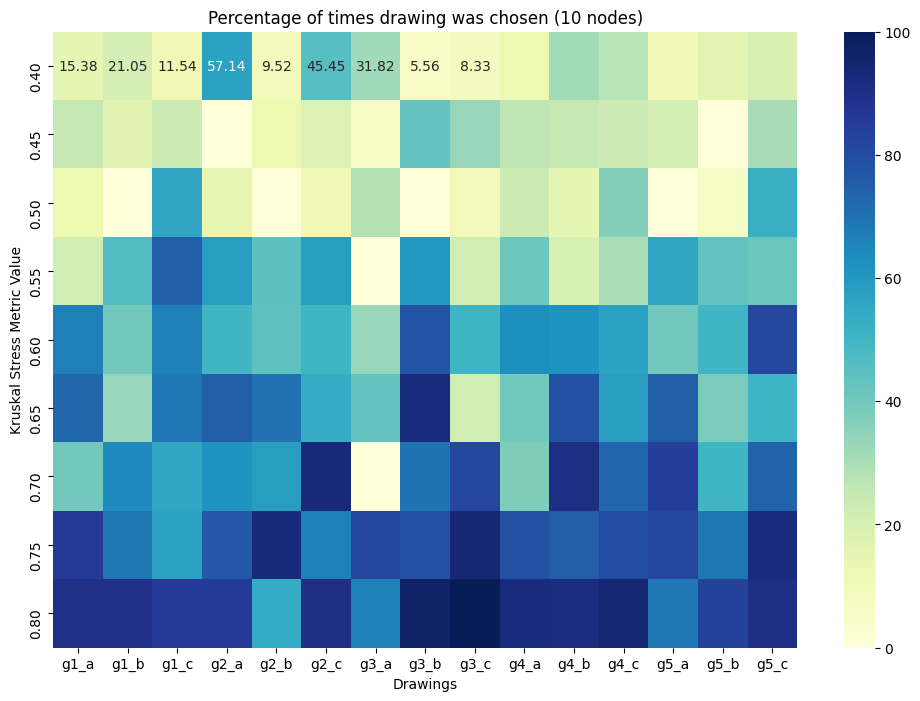

{'total': 5, 'times_chosen': 0}
['g3_l60_c', 'g3_l70_a']
['g3_l65_b', 'g3_l70_a']
['g3_l70_a', 'g3_l55_c']
['g3_l70_a', 'g3_l60_b']
['g3_l70_a', 'g3_l55_b']
5


In [49]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference10_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for (i, pair), delta in zip(enumerate(drawings), row['deltas']):
        if delta == 0:
            continue
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"0.{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (10 nodes)")
plt.show()
print(matrix_dict['g3_l70_a'])

count = 0
for index, row in preference10_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for (i, pair), delta in zip(enumerate(drawings), row['deltas']):
        if delta == 0:
            continue
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            if drawing == 'g3_l70_a':
                print(pair)
                count += 1

print(count)

# 25 node drawings choice

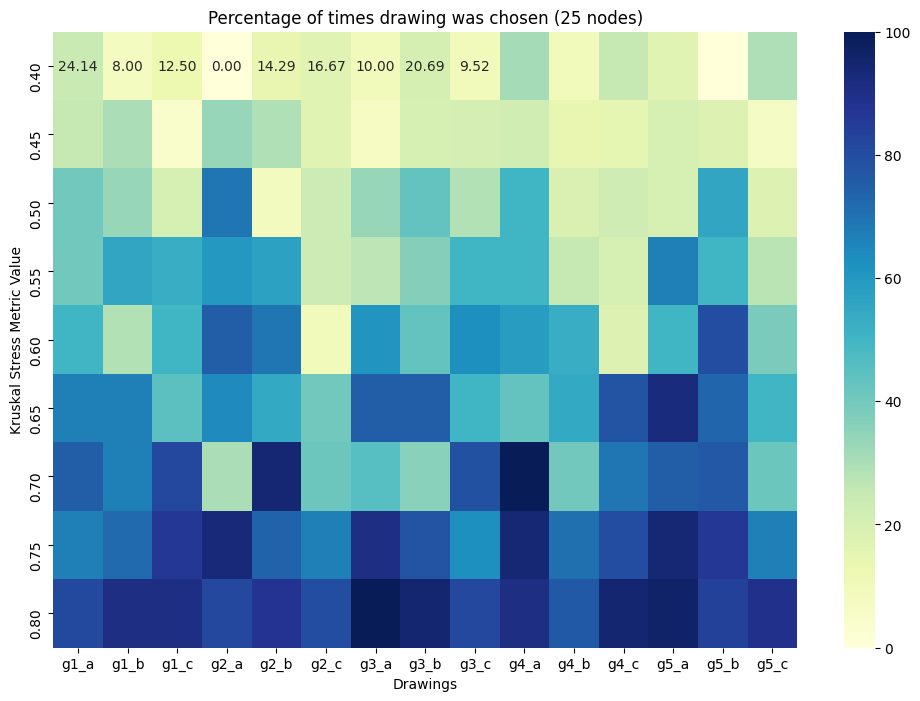

In [50]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference25_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"0.{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (25 nodes)")
plt.show()

# 50 node drawings choice

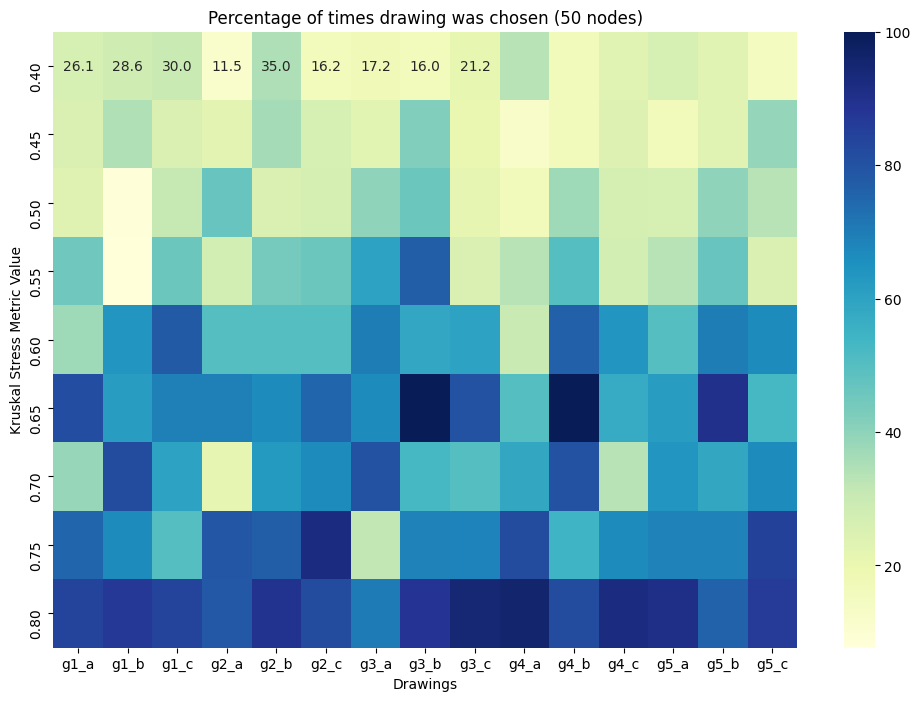

In [51]:
from collections import defaultdict

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Create the nested dictionary structure
matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

# dict(list(matrix_dict.items())[:10])  

for index, row in preference50_df.iterrows():
    drawings = eval(row['drawings'])  # Convert string to list of pairs

    for i, pair in enumerate(drawings):
        # Update the 'total' for both drawings in the pair
        for drawing in pair:
            matrix_dict[drawing]['total'] += 1

        # Update the 'times_chosen' for the selected drawing
        if row['answers'][i] == 1:
            matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
        elif row['answers'][i] == 2:
            matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected


# Initialize the matrix
heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

# Populate the matrix with ratio (times_chosen / total)
for i, l in enumerate(l_values):  # Rows correspond to l_values
    for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
        for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
            key = f"{g}_l{l}_{ta}"
            total = matrix_dict[key]['total']
            times_chosen = matrix_dict[key]['times_chosen']
            ratio = (times_chosen / total * 100) if total > 0 else 0
            heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values], 
    yticklabels=[f"0.{l}" for l in l_values]
)
plt.xlabel("Drawings")
plt.ylabel("Kruskal Stress Metric Value")
plt.title("Percentage of times drawing was chosen (50 nodes)")
plt.show()

In [13]:
t_stat, p_value  = ttest_ind(preference10_df['average_accuracy'], preference50_df['average_accuracy'], equal_var=False)  # Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.0179349958317194
P-value: 0.9857709606792133


C:\Users\User\AppData\Local\Temp\ipykernel_76696\636705685.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


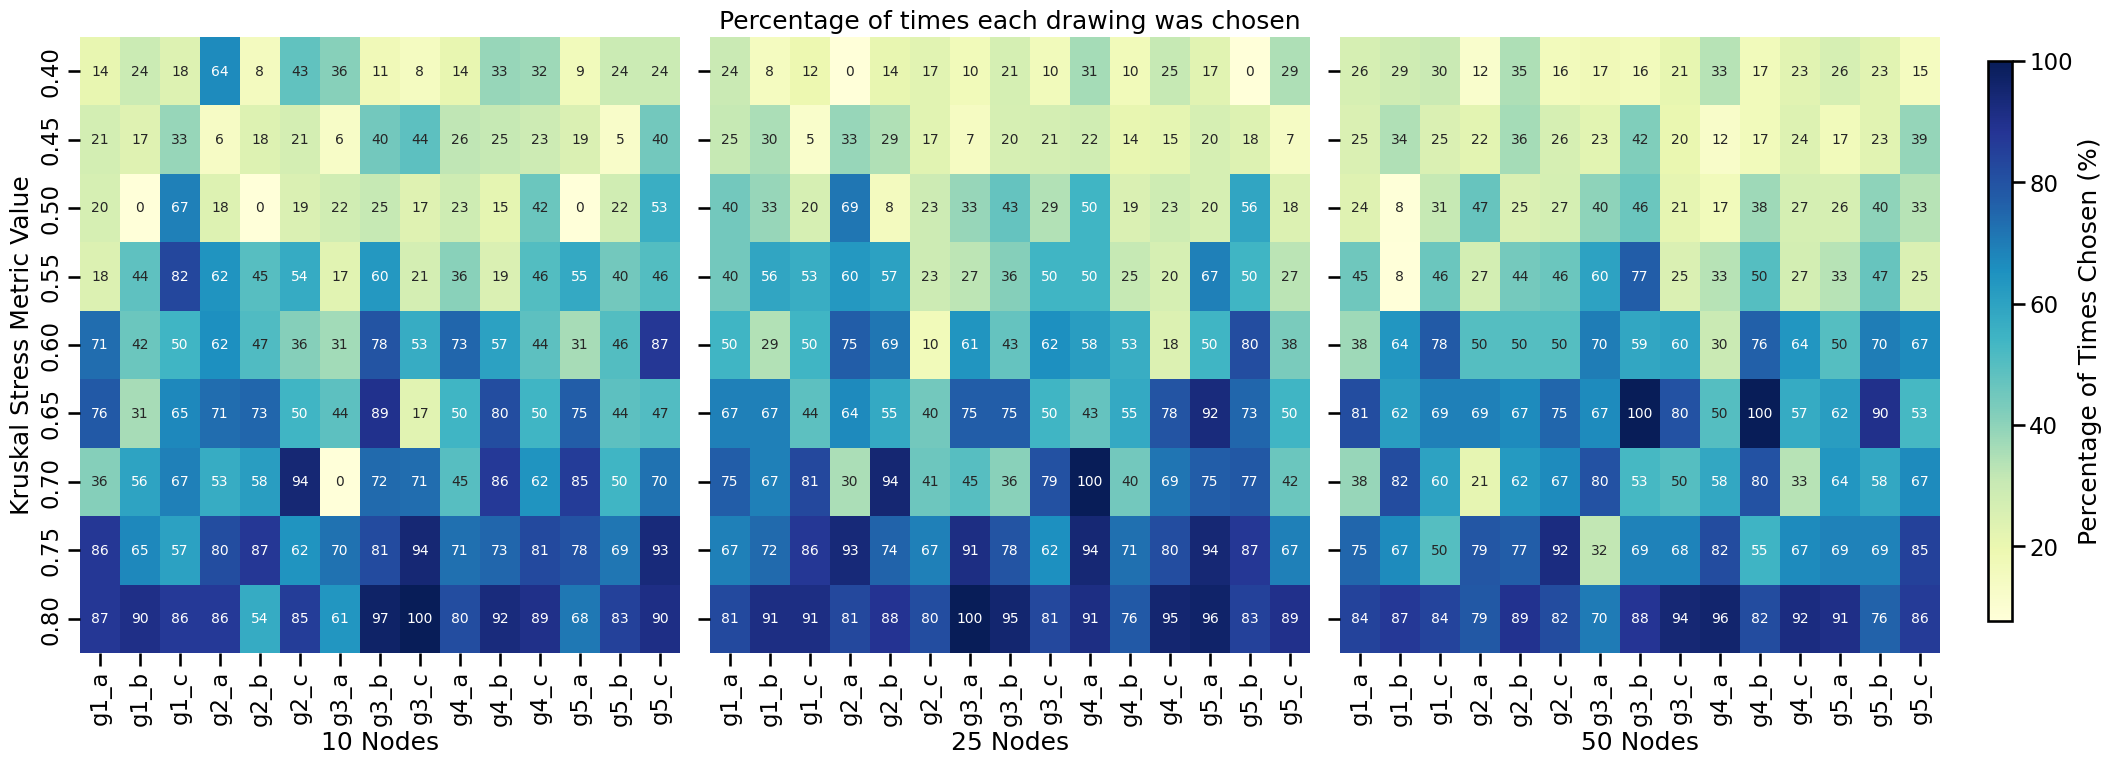

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("talk", font_scale=1)

def generate_heatmap_matrix(df):
    # Initialize the matrix
    heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

    # Populate the matrix with ratio (times_chosen / total)
    for i, l in enumerate(l_values):  # Rows correspond to l_values
        for j, g in enumerate(g_values):  # Loop through each g (g1, g2, etc.)
            for k, ta in enumerate(ta_values):  # Columns correspond to ta_values
                key = f"{g}_l{l}_{ta}"
                total = matrix_dict[key]['total']
                times_chosen = matrix_dict[key]['times_chosen']
                ratio = (times_chosen / total * 100) if total > 0 else 0
                heatmap_matrix[i, j * 3 + k] = ratio  # Assign to the correct column in the matrix
    return heatmap_matrix

# Create the figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True, gridspec_kw={'wspace': 0.05})  # Reduced wspace

# List of datasets and corresponding titles
datasets = [preference10_df, preference25_df, preference50_df]
titles = ["10 Nodes", "25 Nodes", "50 Nodes"]

# Define the grid structure for the keys
g_values = [f"g{i}" for i in range(1, 6)]  # g1 to g5
l_values = [40, 45, 50, 55, 60, 65, 70, 75, 80]  # l40 to l80
ta_values = ["a", "b", "c"]  # a to c

# Generate all keys in the required format
keys = [f"{g}_l{l}_{ta}" for l in l_values for g in g_values for ta in ta_values]

# Generate and plot the heatmaps
for ax, df, title in zip(axes, datasets, titles):
    # Reset the matrix_dict for each dataset
    matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

    # Populate matrix_dict with the current dataframe
    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs

        for i, pair in enumerate(drawings):
            # Update the 'total' for both drawings in the pair
            for drawing in pair:
                matrix_dict[drawing]['total'] += 1

            # Update the 'times_chosen' for the selected drawing
            if row['answers'][i] == 1:
                matrix_dict[pair[0]]['times_chosen'] += 1  # First drawing selected
            elif row['answers'][i] == 2:
                matrix_dict[pair[1]]['times_chosen'] += 1  # Second drawing selected

    # Generate the heatmap matrix
    heatmap_matrix = generate_heatmap_matrix(df)

    # Plot the heatmap with annotations
    sns.heatmap(
        heatmap_matrix,
        annot=True,  # Add annotations
        annot_kws={"size": 10},  # Adjust font size of annotations
        fmt=".0f",
        cmap="YlGnBu",
        cbar=False,  # Disable individual color bars
        ax=ax,
        xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values],
        yticklabels=[f"0.{l}" for l in l_values]
    )
    ax.set_xlabel(title)
    if ax == axes[0]:
        ax.set_ylabel("Kruskal Stress Metric Value")
    if ax == axes[1]:
        ax.set_title('Percentage of times each drawing was chosen')

# Add a thinner shared colorbar closer to the heatmaps
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
fig.colorbar(axes[-1].collections[0], cax=cbar_ax, label="Percentage of Times Chosen (%)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar
plt.savefig('figures/preference_heatmaps.pdf', format='pdf')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28208\1660462545.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


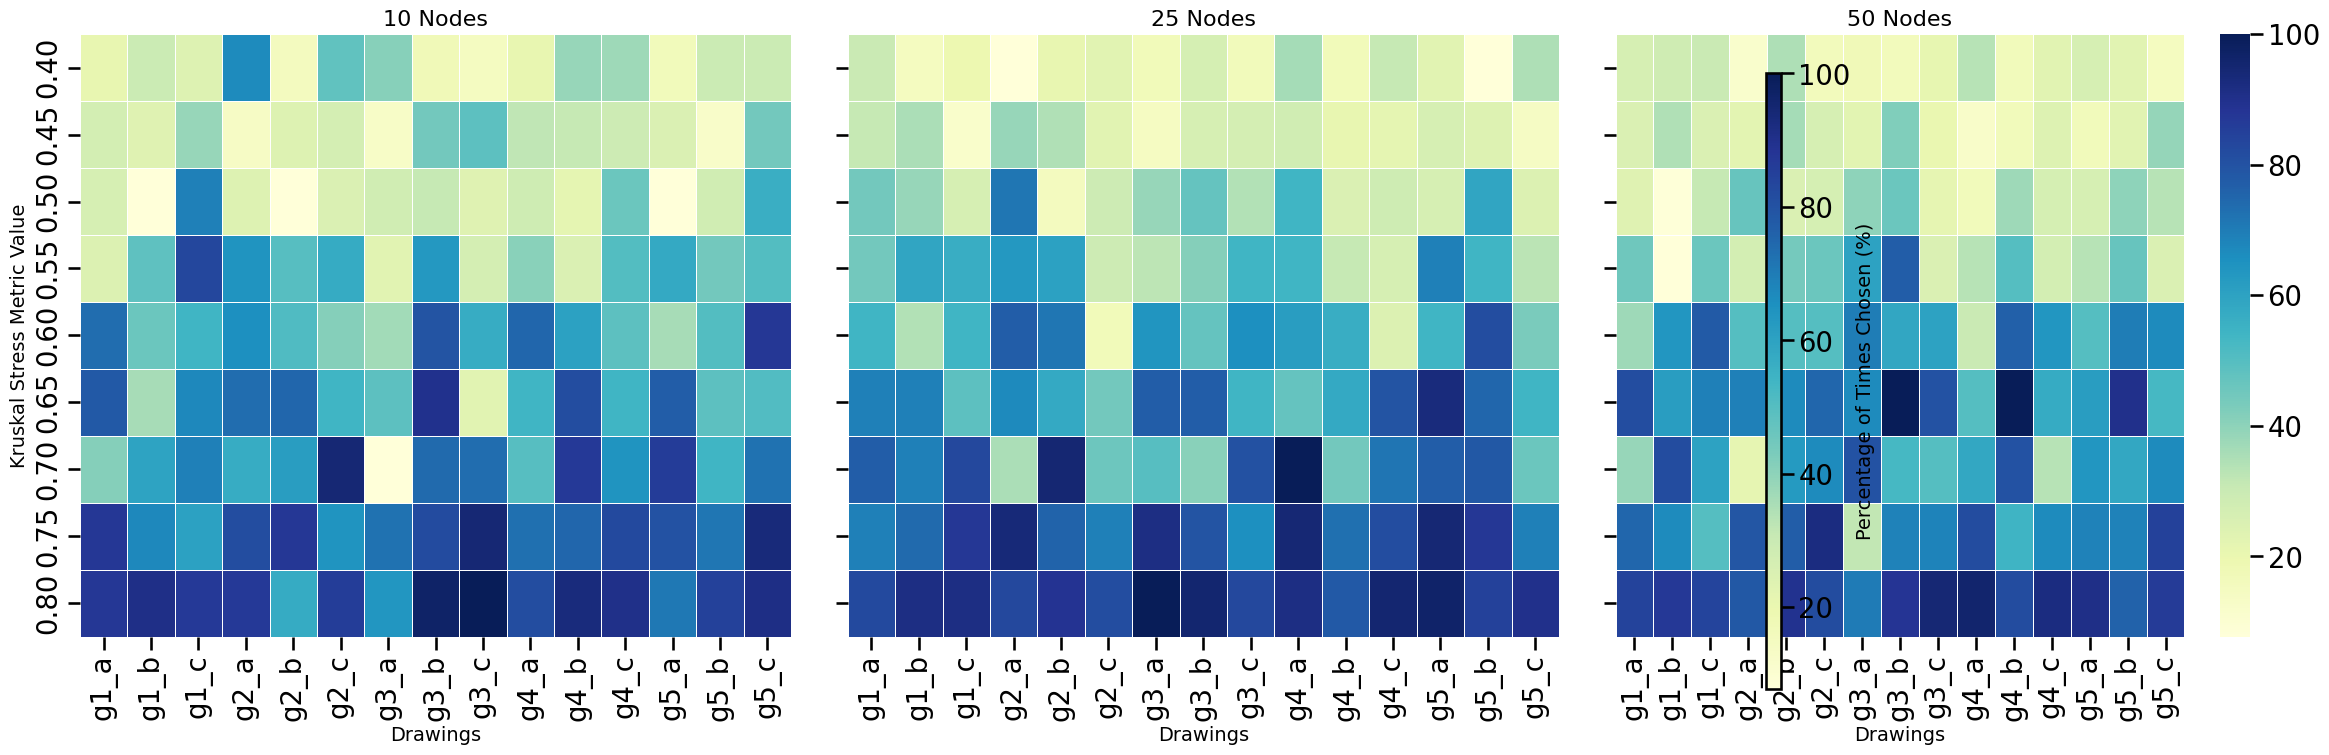

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn context for larger fonts
sns.set_context("talk", font_scale=1.2)  # Adjust `font_scale` to control font size

# Function to generate the heatmap matrix
def generate_heatmap_matrix(df):
    heatmap_matrix = np.zeros((9, 15))  # 9 rows (l_values) x 15 columns (g_values x ta_values)

    for i, l in enumerate(l_values):
        for j, g in enumerate(g_values):
            for k, ta in enumerate(ta_values):
                key = f"{g}_l{l}_{ta}"
                total = matrix_dict[key]['total']
                times_chosen = matrix_dict[key]['times_chosen']
                ratio = (times_chosen / total * 100) if total > 0 else 0
                heatmap_matrix[i, j * 3 + k] = ratio
    return heatmap_matrix

# Create the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)  # Wider figure for smaller cells

# Datasets and titles
datasets = [preference10_df, preference25_df, preference50_df]
titles = ["10 Nodes", "25 Nodes", "50 Nodes"]

for ax, df, title in zip(axes, datasets, titles):
    matrix_dict = {key: {"total": 0, "times_chosen": 0} for key in keys}

    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs
        for i, pair in enumerate(drawings):
            for drawing in pair:
                matrix_dict[drawing]['total'] += 1
            if row['answers'][i] == 1:
                matrix_dict[pair[0]]['times_chosen'] += 1
            elif row['answers'][i] == 2:
                matrix_dict[pair[1]]['times_chosen'] += 1

    heatmap_matrix = generate_heatmap_matrix(df)

    sns.heatmap(
        heatmap_matrix,
        annot=False,
        fmt=".2f",
        cmap="YlGnBu",
        cbar=(ax == axes[-1]),  # Only show color bar on the last heatmap
        ax=ax,
        xticklabels=[f"{g}_{ta}" for g in g_values for ta in ta_values],
        yticklabels=[f"0.{l}" for l in l_values],
        square=False,  # Allow cells to adjust based on figure size
        linewidths=0.5,  # Add spacing between cells
        linecolor="white"
    )
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Drawings", fontsize=14)
    if ax == axes[0]:
        ax.set_ylabel("Kruskal Stress Metric Value", fontsize=14)

# Add a shared colorbar
# cbar = fig.colorbar(axes[2].collections[0], ax=axes, location='right', aspect=40)
# cbar.set_label("Percentage of Times Chosen (%)", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [54]:
from collections import defaultdict

gcount = defaultdict(complex)
for n,df in zip([10,25,50], [preference10_df, preference25_df, preference50_df]):
    n = str(n)
    for index, row in df.iterrows():
        drawings = eval(row['drawings'])  # Convert string to list of pairs

        for i, pair in enumerate(drawings):
            # Update the 'total' for both drawings in the pair
            for drawing in pair:
                gcount[n + drawing] += 1j

            # Update the 'times_chosen' for the selected drawing
            if row['answers'][i] == 1:
                gcount[n + pair[0]] += 1  # First drawing selected
            elif row['answers'][i] == 2:
                gcount[n + pair[1]] += 1  # Second drawing selected

In [61]:
gcount.keys()

dict_keys(['10g4_l40_c', '10g4_l45_b', '10g5_l70_a', '10g5_l65_c', '10g2_l50_c', '10g2_l60_b', '10g5_l50_b', '10g5_l80_a', '10g2_l50_b', '10g2_l70_c', '10g1_l55_a', '10g1_l55_c', '10g2_l40_b', '10g2_l75_a', '10g4_l80_c', '10g4_l40_b', '10g3_l45_c', '10g3_l60_a', '10g4_l60_c', '10g4_l40_a', '10g2_l40_c', '10g2_l80_b', '10g3_l55_b', '10g3_l75_c', '10g5_l40_a', '10g5_l50_c', '10g5_l45_b', '10g3_l70_c', '10g3_l45_b', '10g1_l50_a', '10g3_l80_a', '10g1_l70_a', '10g1_l55_b', '10g2_l55_a', '10g2_l75_c', '10g2_l70_a', '10g4_l65_a', '10g4_l50_b', '10g5_l75_c', '10g5_l40_b', '10g2_l45_a', '10g3_l80_c', '10g3_l40_b', '10g5_l40_c', '10g5_l80_b', '10g4_l75_c', '10g4_l45_a', '10g2_l50_a', '10g1_l80_b', '10g1_l50_c', '10g5_l60_c', '10g5_l60_a', '10g5_l55_a', '10g5_l70_b', '10g2_l40_a', '10g2_l70_b', '10g1_l40_a', '10g1_l75_c', '10g1_l65_a', '10g1_l45_b', '10g4_l55_b', '10g4_l70_c', '10g3_l50_b', '10g3_l60_c', '10g3_l50_c', '10g1_l45_c', '10g4_l75_a', '10g4_l80_b', '10g5_l45_a', '10g2_l65_a', '10g1_l80

In [62]:
x = [val.real / val.imag for val in gcount.values()]
y = [int(key.split("_")[1].replace("l","")) / 100 for key in gcount.keys()]

data = pd.DataFrame({
    "x": [val.real / val.imag for val in gcount.values()],
    'y': [int(key.split("_")[1].replace("l","")) / 100 for key in gcount.keys()], 
    'group': [k[0] + k[1] for k in gcount.keys()]
})

data.head()

,x,y,group
0,0.323529,0.40,10
1,0.250000,0.45,10
2,0.850000,0.70,10
3,0.466667,0.65,10
4,0.190476,0.50,10


Text(0.5, 1.0, 'Preference ratio vs. KSM (Correlation 0.81)')

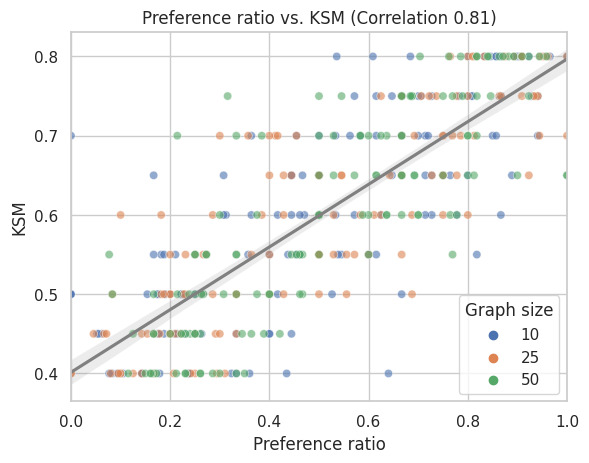

In [ ]:
import seaborn as sns 
sns.set_theme(style='whitegrid')

scatter = sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='group',
    # style='group',
    palette='deep',
    # s=100,
    alpha=0.6
)

sns.regplot(
    data=data,
    x='x',
    y='y',
    scatter=False,  
    color='gray',  
    ci=95,
)

plt.xlabel("Preference ratio")
plt.ylabel("KSM")
plt.legend(title="Graph size")
plt.title("Preference ratio vs. KSM (Correlation 0.81)")
plt.savefig("figures/correlation.pdf")

In [81]:
from scipy.stats import pearsonr
pearsonr(data['x'], data['y'])

PearsonRResult(statistic=0.8137608943137657, pvalue=5.142030966927861e-97)